In [5]:
%pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.datasets import fetch_olivetti_faces

In [8]:
faces = fetch_olivetti_faces(shuffle=True, random_state=42)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\banda\scikit_learn_data


In [19]:
X = faces.data # Images data with 64x64 pixels

In [10]:
n_sample, n_features = X.shape

In [11]:
n_sample

400

In [12]:
n_features

4096

In [13]:
image_shape = faces.images[0].shape
image_shape

(64, 64)

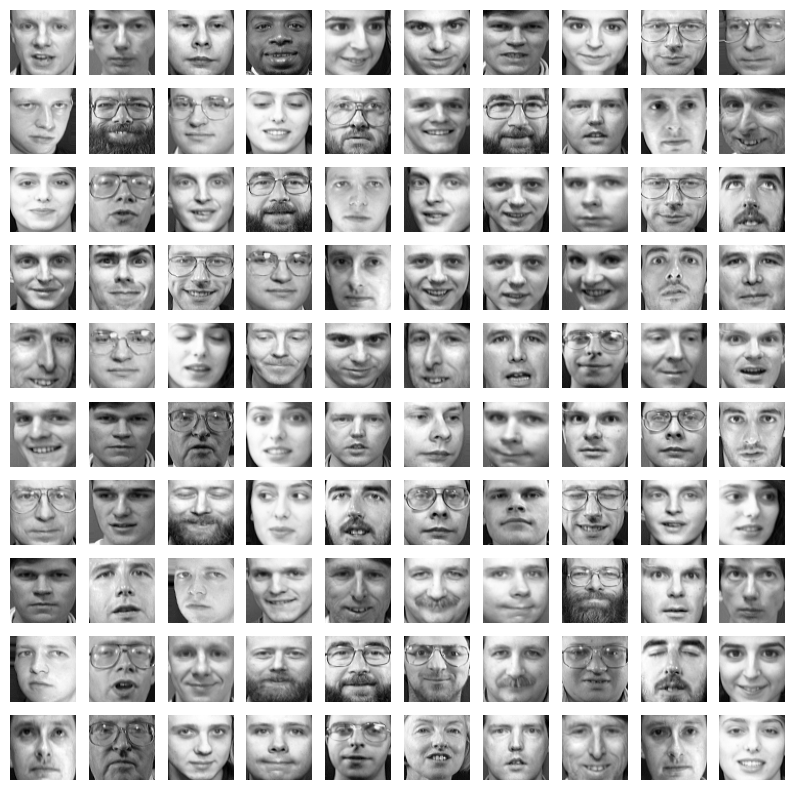

In [41]:
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(faces.images[i], cmap='gray')
    plt.axis('off')
plt.show()



In [14]:
n_components = 150 # the number of principal components to keep

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=n_components, whiten=True, random_state=42 )
X_pca = pca.fit_transform(X)

In [44]:
n_print = 12

print("Propotion of total variation explaine by the first 12 PCs")
for i in range(n_print):
    variance_explained = pca.explained_variance_ratio_[i]
    print(f"PC {i + 1}: {variance_explained*100:.1f}%")

Propotion of total variation explaine by the first 12 PCs
PC 1: 23.8%
PC 2: 14.0%
PC 3: 8.0%
PC 4: 5.0%
PC 5: 3.6%
PC 6: 3.2%
PC 7: 2.4%
PC 8: 2.0%
PC 9: 2.0%
PC 10: 1.7%
PC 11: 1.6%
PC 12: 1.4%


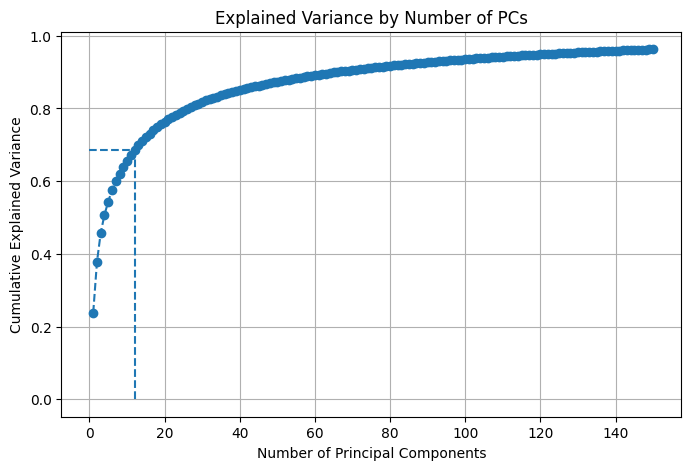

In [51]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, n_components + 1), cumulative_variance, marker='o', linestyle='--')
# mark lines
plt.vlines(x=12, ymin=0, ymax=cumulative_variance[11], linestyles='dashed')
plt.hlines(y=cumulative_variance[11], xmin=0, xmax=12, linestyles='dashed')
plt.title('Explained Variance by Number of PCs')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.grid()
plt.show()

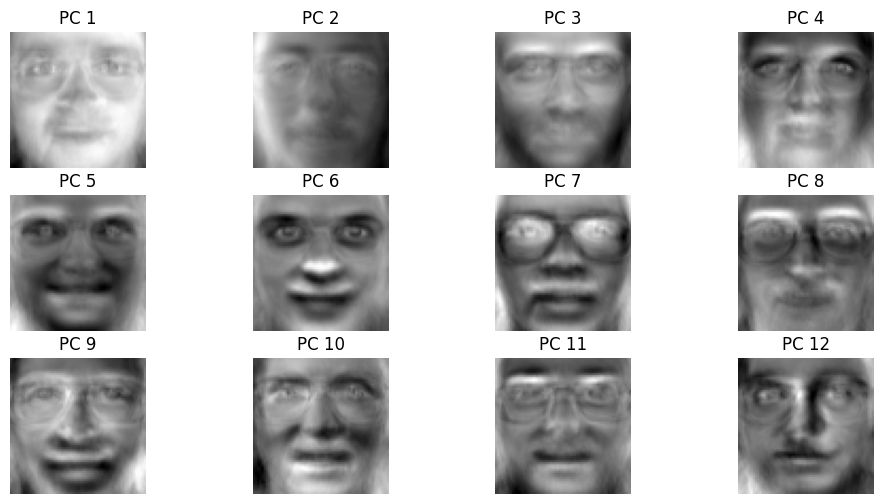

In [57]:
n_eigenfaces = 12
plt.figure(figsize=(12, 6))
for i in range(n_eigenfaces):
    plt.subplot(3, 4, i + 1)
    plt.imshow(pca.components_[i].reshape(image_shape), cmap='gray')
    plt.title(f"PC {i + 1}")
    plt.axis('off')
plt.show()